# CA2 - Supervised machine learning classification pipeline - applied to medical data

### Important information

- Do __not__ use scikit-learn (`sklearn`) or any other high-level machine learning library for this CA
- Explain your code and reasoning in markdown cells or code comments
- Label all graphs and charts if applicable
- If you use code from the internet, make sure to reference it and explain it in your own words
- If you use additional function arguments, make sure to explain them in your own words
- Use the classes `Perceptron`, `Adaline` and `Logistic Regression` from the library `mlxtend` as classifiers (`from mlxtend.classifier import Perceptron, Adaline, LogisticRegression`). _Always_ use the argument `minibatches=1` when instantiating an `Adaline` or `LogisticRegression` object. This makes the model use the gradient descent algorithm for training. Always use the `random_seed=42` argument when instantiating the classifiers. This will make your results reproducible.
- You can use any plotting library you want (e.g. `matplotlib`, `seaborn`, `plotly`, etc.)
- Use explanatory variable names (e.g. `X_train` and `X_train_scaled` for the training data before and after scaling, respectively)
- The dataset is provided in the file `fetal_health.csv` in the `assets` folder

### Additional clues

- Use the `pandas` library for initial data inspection and preprocessing
- Before training the classifiers, convert the data to raw `numpy` arrays
- For Part IV, you are aiming to create a plot that looks similar to this:
<img src="./assets/example_output.png" width="300">

### Additional information

- Feel free to create additional code or markdown cells if you think it will help you explain your reasoning or structure your code (you don't have to).


## Part I: Data loading and data exploration

### Import necessary libraries/modules:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from mlxtend.classifier import Adaline, Perceptron, LogisticRegression

### Loading and exploring data

1. Load the dataset `fetal_health.csv` with `pandas`. Use the first column as the row index.
2. Check for missing data, report on your finding and remove samples with missing data, if you find any.
3. Display the raw data with appropriate plots/outputs and inspect it. Describe the distributions of the values of feature `"baseline value"`, `"accelerations"`, and the target variable `"fetal_health"`.
4. Will it be beneficial to scale the data? Why or why not?
5. Is the data linearly separable using a combination of any two pairs of features? Can we expect an accuracy close to 100% from a linear classifier?

In [2]:
# Loading the data 
df = pd.read_csv('fetal_health.csv', header=0, index_col=0)
df.head()

baseline value  accelerations  prolongued_decelerations  \
1584           132.0          0.000                       0.0   
942            136.0          0.003                       0.0   
1376           121.0          0.006                       0.0   
169            116.0          0.001                       0.0   
1293           115.0          0.006                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
1584                             35.0                                   1.3   
942                              54.0                                   0.7   
1376                             24.0                                   1.7   
169                              46.0                                   0.7   
1293                             19.0                                   1.7   

      percentage_of_time_with_abnormal_long_term_variability  histogram_mean  \
1584                                                0.0                135.0   
942                                                15.0                141.0   
1376                                                0.0                121.0   
169                                                39.0                120.0   
1293                                                0.0                121.0   

      histogram_variance  fetal_health  
1584                 9.0             0  
942                  8.0             0  
1376                25.0             0  
169                  1.0             0  
1293                 9.0             0

In [3]:
# Identifying rows with NaN values
nan_df = df.isna()
# print(nan_df)

# Removing rows with NaN
df = df.dropna()

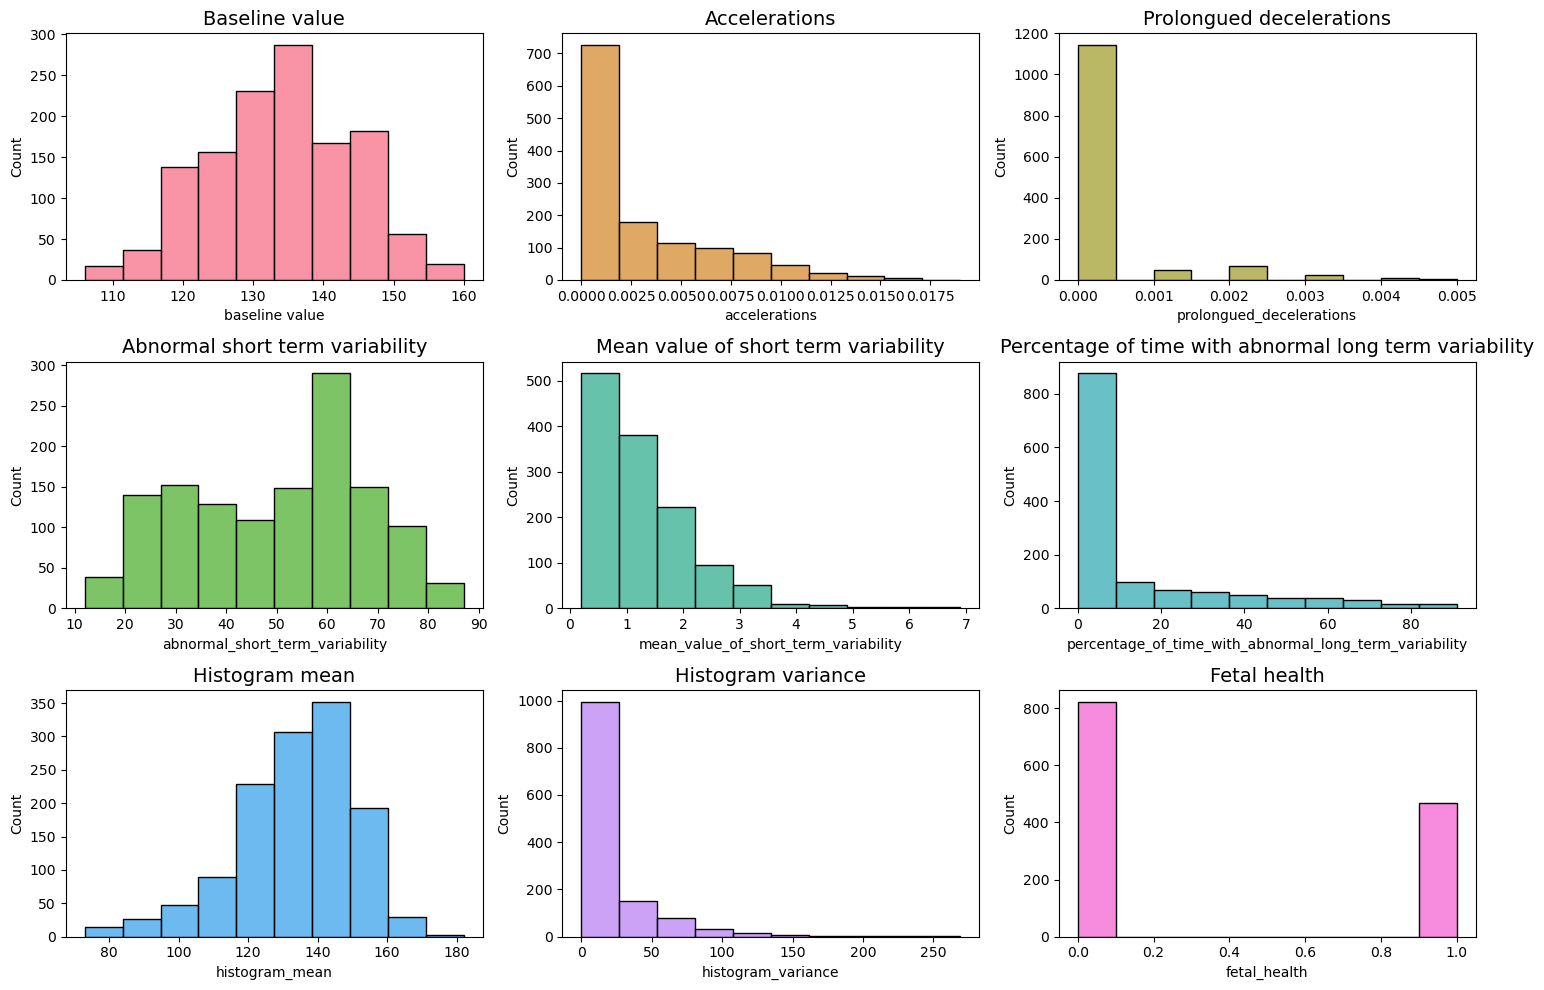

In [4]:
# Plotting numerical histogram distribution using code from 01_raw_data_inspection.ipynb
var_title_dict = {'baseline value': 'Baseline value', 
                  'accelerations': 'Accelerations', 
                  'prolongued_decelerations': 'Prolongued decelerations',
                  'abnormal_short_term_variability': 'Abnormal short term variability',
                  'mean_value_of_short_term_variability': 'Mean value of short term variability',
                  'percentage_of_time_with_abnormal_long_term_variability': 'Percentage of time with abnormal long term variability',
                  'histogram_mean': 'Histogram mean',
                  'histogram_variance': 'Histogram variance',
                  'fetal_health': 'Fetal health'}


fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Increased figure size
axes = axes.flatten()  # Convert to 1D array for easy indexing

colors = sns.color_palette("husl", len(var_title_dict))  # Seaborn color palette to customize the plot

for idx, var in enumerate(var_title_dict.keys()):
    sns.histplot(data=df[var], ax=axes[idx], bins=10, color=colors[idx])
    axes[idx].set_title(var_title_dict[var], fontsize=14)

plt.tight_layout()
plt.show()

#### Task 1.3

**Baseline value:** The base line value describes the baseline fetal heart rate. This data is normally distributed. 

**Accelerations:** The acceleration variable tells us the number of times the fetal heart rate briefly increases. This distribution is highly skewed to the right.

**Fetal health:** Fetal health is a categorical variable in the data set. This is a binary output/categorical variable (0 or 1). 0 is roughly twice as lagre as 1.


#### Task 1.4

It would probably be beneficial to scale the data, as the different features have different ranges. Scaling the data will help improve the performance of models and prevent features with large ranges from dominating.

#### Task 1.5

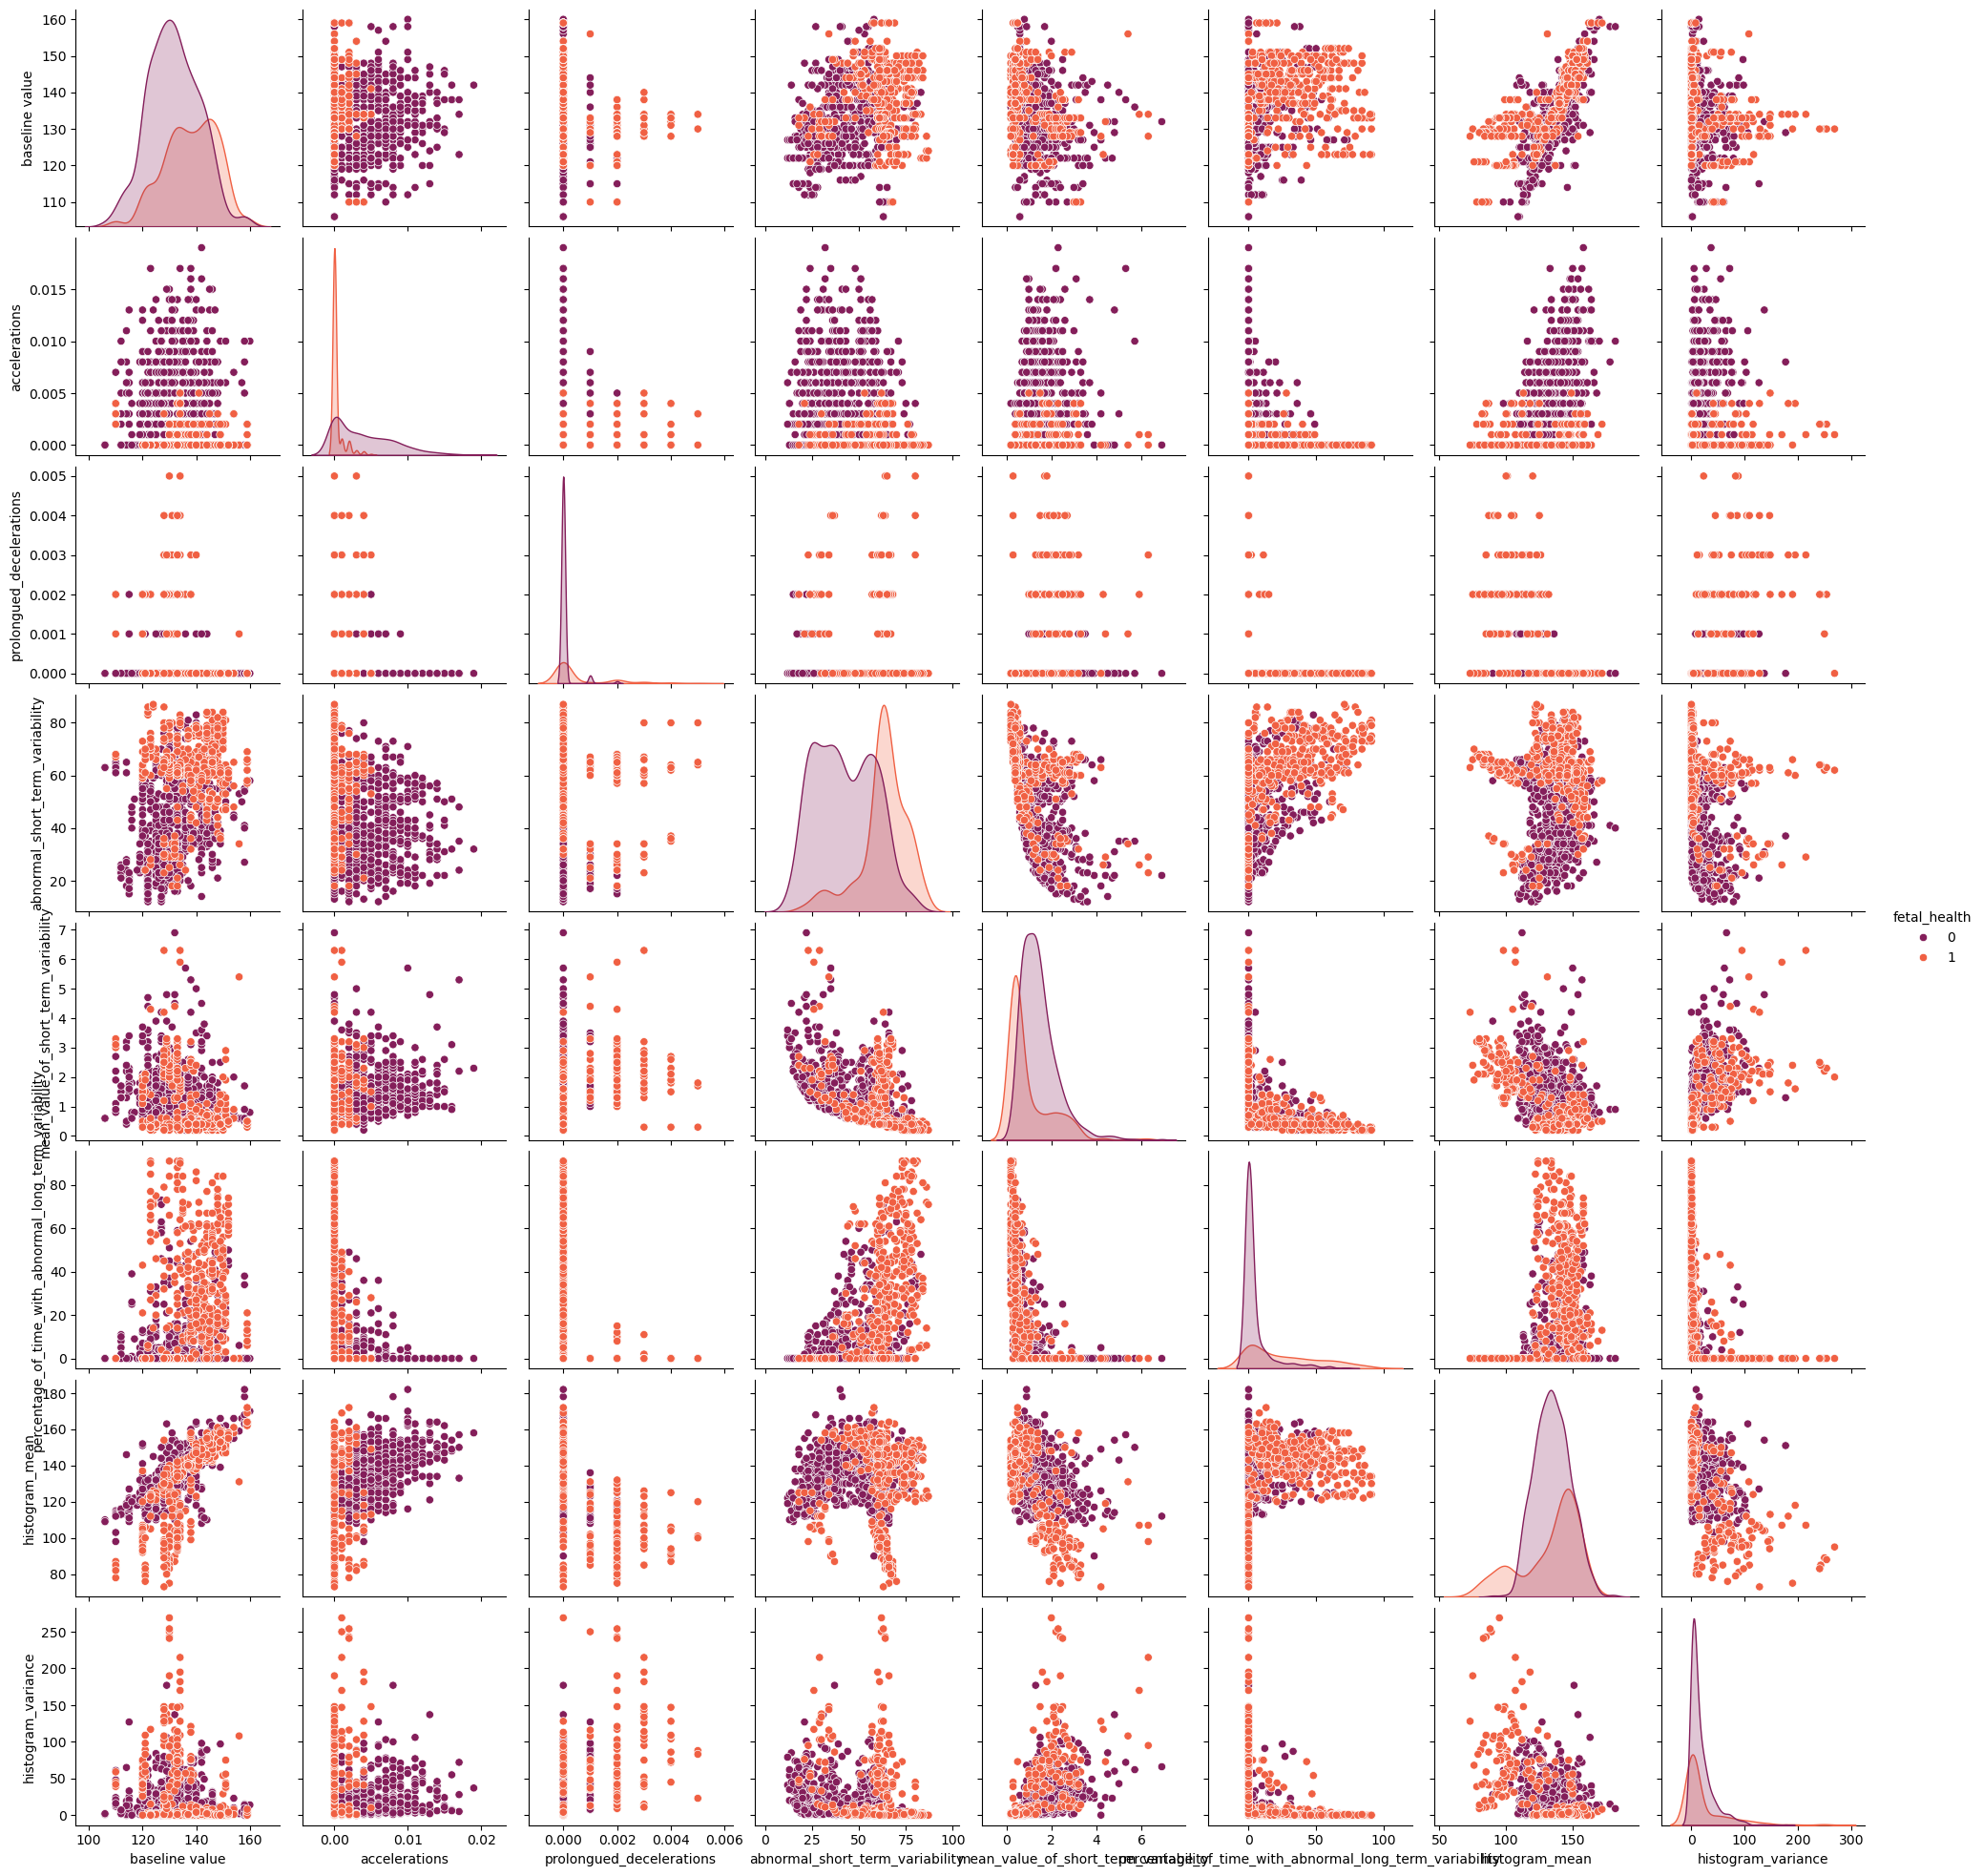

In [5]:
# Pair plot to check for linear separability 
sns.pairplot(df, hue="fetal_health", palette='rocket')
plt.show()

As we can see from the pair plot, the data is not linearly separable, and we will therefore not be able to get 100% accuracy.

## Part II: Train/Test Split

Divide your dataset into training and testing subsets. Follow these steps to create the split:

1. **Divide the dataset into two data sets, each data set only contains samples of either class 0 or class 1:**
- Create a DataFrame `df_0` containing all data with `"fetal_health"` equal to 0.
- Create a DataFrame `df_1` containing all data with `"fetal_health"` equal to 1.

2. **Split into training and test set by randomly sampling entries from the data frames:**
- Create a DataFrame `df_0_train` containing by sampling `75%` of the entries from `df_0` (use the `sample` method of the data frame, fix the `random_state` to `42`).
- Create a DataFrame `df_1_train` using the same approach with `df_1`.
- Create a DataFrame `df_0_test` containing the remaining entries of `df_0` (use `df_0.drop(df_0_train.index)` to drop all entries except the previously extracted ones).
- Create a DataFrame `df_1_test` using the same approach with `df_1`.

3. **Merge the datasets split by classes back together:**
- Create a DataFrame `df_train` containing all entries from `df_0_train` and `df_1_train`. (Hint: use the `concat` method you know from CA1)
- Create a DataFrame `df_test` containing all entries from the two test sets.

4. **Create the following data frames from these splits:**
- `X_train`: Contains all columns of `df_train` except for the target feature `"fetal_health"`
- `X_test`: Contains all columns of `df_test` except for the target feature `"fetal_health"`
- `y_train`: Contains only the target feature `"fetal_health"` for all samples in the training set
- `y_test`: Contains only the target feature `"fetal_health"` for all samples in the test set

5. **Check that your sets have the expected sizes/shape by printing number of rows and colums ("shape") of the data sets.**
- (Sanity check: there should be 8 features, almost 1000 samples in the training set and slightly more than 300 samples in the test set.)


6. **Explain the purpose of this slightly complicated procedure. Why did we first split into the two classes? Why did we then split into a training and a testing set?**


7. **What is the share (in percent) of samples with class 0 label in test and training set, and in the intial data set?**



In [6]:
# Deviding the dataset into two dataframes based on fetal health class (0 or 1)
df_0 = df[df['fetal_health'] == 0]
df_1 = df[df['fetal_health'] == 1] 

# Splitting our datasets into traning and test sets
df_0_train = df_0.sample(frac=0.75, random_state=42)
df_0_test = df_0.drop(df_0_train.index)

df_1_train = df_1.sample(frac=0.75, random_state=42)
df_1_test = df_1.drop(df_1_train.index)

# Merging our training sets and our test sets into one training and one test set
df_train = pd.concat([df_0_train, df_1_train])
df_test = pd.concat([df_0_test, df_1_test])

# Datasets containing all features exept the target feature (fetal_health)
X_train = df_train.drop(columns=['fetal_health'])
X_test = df_test.drop(columns=['fetal_health'])

# Datasets containing only the target feature
y_train = df_train['fetal_health']
y_test = df_test['fetal_health']

print(X_train.shape)
print(X_test.shape)

(967, 8)
(323, 8)


#### Task 2.6

We split our data into training and test sets so that we have some data to train our model on, and som unseen data to test our model on afterwards. We first split the two classes to make sure the training set includes 75% of both class 0 and class 1, and not just 75% of the entire dataset.

#### Task 2.7

In [7]:
class_0 = len(df_0) # No. of class 0 in initital data set
class_0_train = len(df_train[df_train['fetal_health'] == 0]) # No. of class 0 in training set
class_0_test = len(df_test[df_test['fetal_health'] == 0]) # No. of class 0 in test set

print(f'The share of samples with class 0 in initial data set: {class_0 / len(df["fetal_health"]) * 100:.2f}%')
print(f'The share of samples with class 0 in training set: {class_0_train / len(df_train["fetal_health"]) * 100:.2f}%')
print(f'The share of samples with class 0 in test set: {class_0_test / len(df_test["fetal_health"]) * 100:.2f}%')

The share of samples with class 0 in initial data set: 63.80%
The share of samples with class 0 in training set: 63.81%
The share of samples with class 0 in test set: 63.78%


### Convert data to numpy arrays and shuffle the training data

Many machine learning models (including those you will work with later in the assignment) will not accept DataFrames as input. Instead, they will only work if you pass numpy arrays containing the data.
Here, we convert the DataFrames `X_train`, `X_test`, `y_train`, and `y_test` to numpy arrays `X_train`, `X_test`, `y_train`, and `y_test`.

Moreover we shuffle the training data. This is important because the training data is currently ordered by class. In Part IV, we use the first n samples from the training set to train the classifiers. If we did not shuffle the data, the classifiers would only be trained on samples of class 0.

Nothing to be done here, just execute the cell.

In [8]:
# Convert to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Shuffle training data
np.random.seed(42) # for reproducibility
shuffle_index = np.random.permutation(len(X_train)) # generate random indices
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] # shuffle data by applying reordering with the random indices

## Part III: Scaling the data

1. Standardize the training _and_ test data so that each feature has a mean of 0 and a standard deviation of 1.
2. Check that the scaling was successful
    - by printing the mean and standard deviation of each feature in the scaled training set
    - by putting the scaled training set into a DataFrame and make a violin plot of the data

__Hint:__ use the `axis` argument to calculate mean and standard deviation column-wise.

__Important:__ Avoid data leakage!

__More hints:__

1. For each column, subtract the mean $(\mu)$ of each column from each value in the column
2. Divide the result by the standard deviation $(\sigma)$ of the column

(You saw how to do both operations in the lecture. If you don't remember, you can look it up in Canvas files.)

Mathematically (in case this is useful for you), this transformation can be represented for each column as follows:

$$ X_\text{scaled} = \frac{(X - \mu)}{\sigma} $$

where:
- $(X_\text{scaled})$ are the new, transformed column values (a column-vector)
- $(X)$ is the original values
- $(\mu)$ is the mean of the column
- $(\sigma)$ is the standard deviation of the column



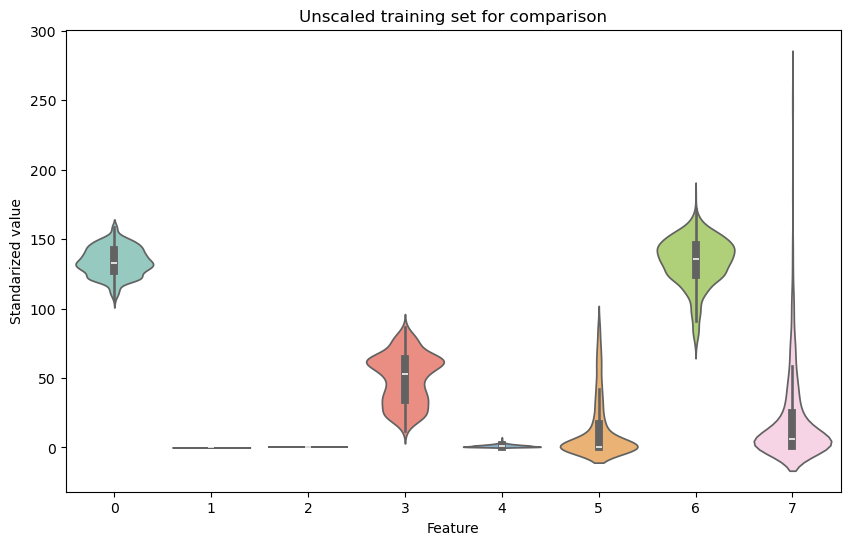

In [17]:
# Plotting the unscaled training set
plt.figure(figsize=(10,6))
sns.violinplot(data=X_train, palette="Set3")
plt.title('Unscaled training set for comparison')
plt.xlabel('Feature')
plt.ylabel('Standarized value')
plt.show()

#### Task 3.1

In [9]:
# Using code example from Ch02_07_scaling_example.py
# Standardizing our traning and test data using the X_scaled formula above
X_train_sc = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0, ddof=1)
X_test_sc = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0, ddof=1)  

# Checking if the scaling of X_train was successful
X_train_sc_mean = np.mean(X_train_sc, axis=0)
X_train_sc_std = np.std(X_train_sc, axis=0, ddof=1)

print(X_train_sc_mean)
print(X_train_sc_std)


[-1.05396560e-16  3.84375974e-15 -3.17337791e-16  1.30195751e-16
 -6.05915410e-17 -3.18026658e-16 -3.16763736e-16 -3.23767211e-17]
[1. 1. 1. 1. 1. 1. 1. 1.]


As we can see, the values of `X_train_sc_mean` are in the range of 1e-16 to 1e-15, which is effectively 0. The values of `X_train_sc_std` are all 1. **The scaling was successful.**

C:\Users\thale\AppData\Local\Temp\ipykernel_23796\1548774893.py:6: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(data=X_train_sc_df, palette="Set3", bw=.2, cut=1, linewidth=1)


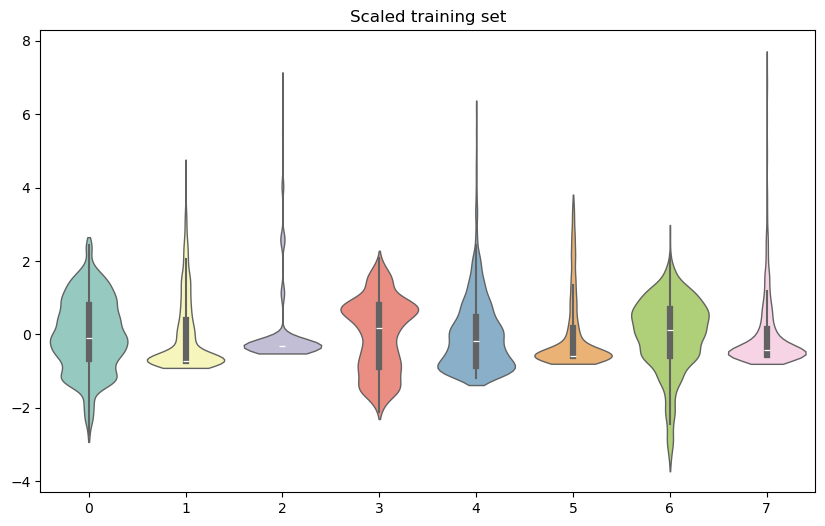

In [10]:
# Scaled dataframe
X_train_sc_df = pd.DataFrame(X_train_sc)

# Violin plot
f, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=X_train_sc_df, palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Scaled training set')
plt.show()

## Part IV: Training and evaluation with different dataset sizes and training times

Often, a larger dataset size will yield better model performance. (As we will learn later, this usually prevents overfitting and increases the generalization capability of the trained model.)
However, collecting data is usually rather expensive.

In this part of the exercise, you will investigate

- how the model performance changes with varying dataset size
- how the model performance changes with varying numbers of epochs/iterations of the optimizer/solver (increasing training time).

For this task (Part IV), use the `Adaline`, `Perceptron`, and `LogisticRegression` classifier from the `mlxtend` library. All use the gradient descent (GD) algorithm for training.

__Important__: Use a learning rate of `1e-4` (`0.0001`) for all classifiers, and use the argument `minibatches=1` when initializing `Adaline` and `LogisticRegression` classifier (this will make sure it uses GD). For all three classifiers, pass `random_seed=42` when initializing the classifier to ensure reproducibility of the results.

### Model training

Train the model models using progressively larger subsets of your dataset, specifically: first 50 rows, first 100 rows, first 150 rows, ..., first 650 rows, first 700 rows (in total $14$ different variants).

For each number of rows train the model with progressively larger number of epochs: 2, 7, 12, 17, ..., 87, 92, 97 (in total $20$ different model variants).

The resulting $14 \times 20 = 280$ models obtained from the different combinations of subsets and number of epochs. An output of the training process could look like this:

```
Model (1) Train a model with first 50 rows of data for 2 epochs
Model (2) Train a model with first 50 rows of data for 7 epochs
Model (3) Train a model with first 50 rows of data for 12 epochs
...
Model (21) Train a model with first 100 rows of data for 2 epochs
Model (22) Train a model with first 100 rows of data for 7 epochs
...
Model (279) Train a model with first 700 rows of data for 92 epochs
Model (280) Train a model with first 700 rows of data for 97 epochs
```

### Model evaluation

For each of the $280$ models, calculate the __accuracy on the test set__ (do __not__ use the score method but compute accuracy yourself).
Store the results in the provided 2D numpy array (it has $14$ rows and $20$ columns).
The rows of the array correspond to the different dataset sizes, and the columns correspond to the different numbers of epochs.

### Tasks
1. Train the $280$ Adaline classifiers as mentioned above and calculate the accuracy for each of the $280$ variants.
2. Generalize your code so that is doing the same procedure for all three classifiers: `Perceptron`, `Adaline`, and `LogisticRegression` after each other. Store the result for all classifiers. You can for example use an array of shape $3\times14\times20$ to store the accuracies of the three classifiers.

Note that executing the cells will take some time (but on most systems it should not be more than 5 minutes).

In [11]:
num_rows = list(range(50, 701, 50)) # No. of rows, [50, 100, ... , 700]
num_epochs = list(range(2, 98, 5)) # No. of epochs, [2, 7, ... , 97]

# Function to calculate the accuracy
def accuracy(y_true, y_pred):
    """
    y_true: Ture labels
    y_pred: predicted labels
    
    Calculates the mean of correct predicitions.
    """
    return np.mean(y_true == y_pred)

# Empty array to store accuracies
accuracies = np.zeros((3, 14, 20))


# Train and evaluate all model variants
models = [
    ('Adaline', Adaline(eta=0.0001, epochs=1, minibatches=1, random_seed=42)),
    ('Perceptron', Perceptron(eta=0.0001, epochs=1, random_seed=42)),
    ('LogisticRegression', LogisticRegression(eta=0.0001, epochs=1, minibatches=1, random_seed=42))
]


for model_idx, (model_name, model) in enumerate(models):
    model_counter = 1 # Counting the models as we loop through them

    for i, n_rows in enumerate(num_rows):
        X_train_subset, y_train_subset = X_train_sc[:n_rows], y_train[:n_rows]

        for j, n_epochs in enumerate(num_epochs):
            model.epochs = n_epochs # Updates the number of epochs for training
            model.fit(X_train_subset, y_train_subset) # Trains the model using the subset
            y_pred = model.predict(X_test_sc) # Predicts labels for the test set
            accuracies[model_idx, i, j] = accuracy(y_test, y_pred)

            print(f'{model_name}: Model ({model_counter}) Train a model with first {n_rows} rows of data fro {n_epochs} epochs - Accuracy: {accuracies[model_idx, i, j]:.2f}')

            model_counter += 1 # Updating our counter for each loop

Adaline: Model (1) Train a model with first 50 rows of data fro 2 epochs - Accuracy: 0.80
Adaline: Model (2) Train a model with first 50 rows of data fro 7 epochs - Accuracy: 0.85
Adaline: Model (3) Train a model with first 50 rows of data fro 12 epochs - Accuracy: 0.87
Adaline: Model (4) Train a model with first 50 rows of data fro 17 epochs - Accuracy: 0.86
Adaline: Model (5) Train a model with first 50 rows of data fro 22 epochs - Accuracy: 0.86
Adaline: Model (6) Train a model with first 50 rows of data fro 27 epochs - Accuracy: 0.86
Adaline: Model (7) Train a model with first 50 rows of data fro 32 epochs - Accuracy: 0.86
Adaline: Model (8) Train a model with first 50 rows of data fro 37 epochs - Accuracy: 0.86
Adaline: Model (9) Train a model with first 50 rows of data fro 42 epochs - Accuracy: 0.86
Adaline: Model (10) Train a model with first 50 rows of data fro 47 epochs - Accuracy: 0.86
Adaline: Model (11) Train a model with first 50 rows of data fro 52 epochs - Accuracy: 0.86

### Performance visualization

Plot the performance measure for all classifiers (accuracy on the test set; use the result array from above) of all the $280$ variants for each classifier in a total of three heatmaps using, for example `seaborn` or `matplotlib` directly.

The color should represent the accuracy on the test set, and the x and y axes should represent the number of epochs and the dataset size, respectively.
Which one is x and which one is y is up to you to decide. Look in the example output at the top of the assignment for inspiration for how the plot could look like and how it could be labeled nicely. (But use the correct numbers corresponding to your dataset sizes and number of epochs.)

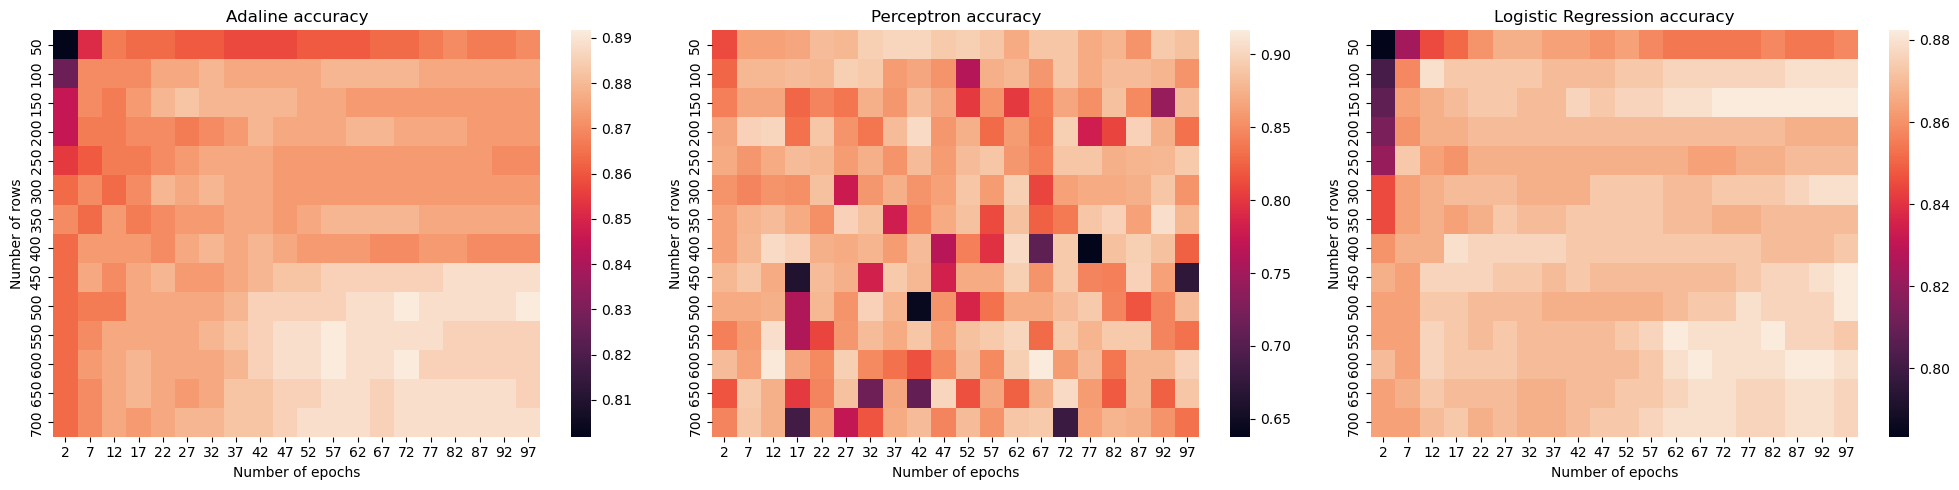

In [12]:
classifiers = ['Adaline', 'Perceptron', 'Logistic Regression'] # Classifier names

fig, axes = plt.subplots(1,3,figsize=(20,5)) # Subplot for each classifier

# Looping through accuracies array for each classifier/model
for i in range(3):
    sns.heatmap(accuracies[i].reshape(len(num_rows), -1), ax=axes[i])

    # Title and labels...
    axes[i].set_title(f'{classifiers[i]} accuracy') 
    axes[i].set_xlabel('Number of epochs')
    axes[i].set_ylabel('Number of rows')
    axes[i].set_xticklabels(num_epochs)
    axes[i].set_yticklabels(num_rows)

plt.tight_layout()
plt.show()

# Part V: Some more plotting

For the following cell to execute you need to have the variable `X_test_scaled` with all samples of the test set and the variable `y_test` with the corresponding labels.
Complete at least up until Part III. Executing the cell will plot something.

1. Add code comments explaining what the lines are doing
2. What is the purpose of the plot?
3. Describe all components of the subplot and then comment in general on the entire plot. What does it show? What does it not show?

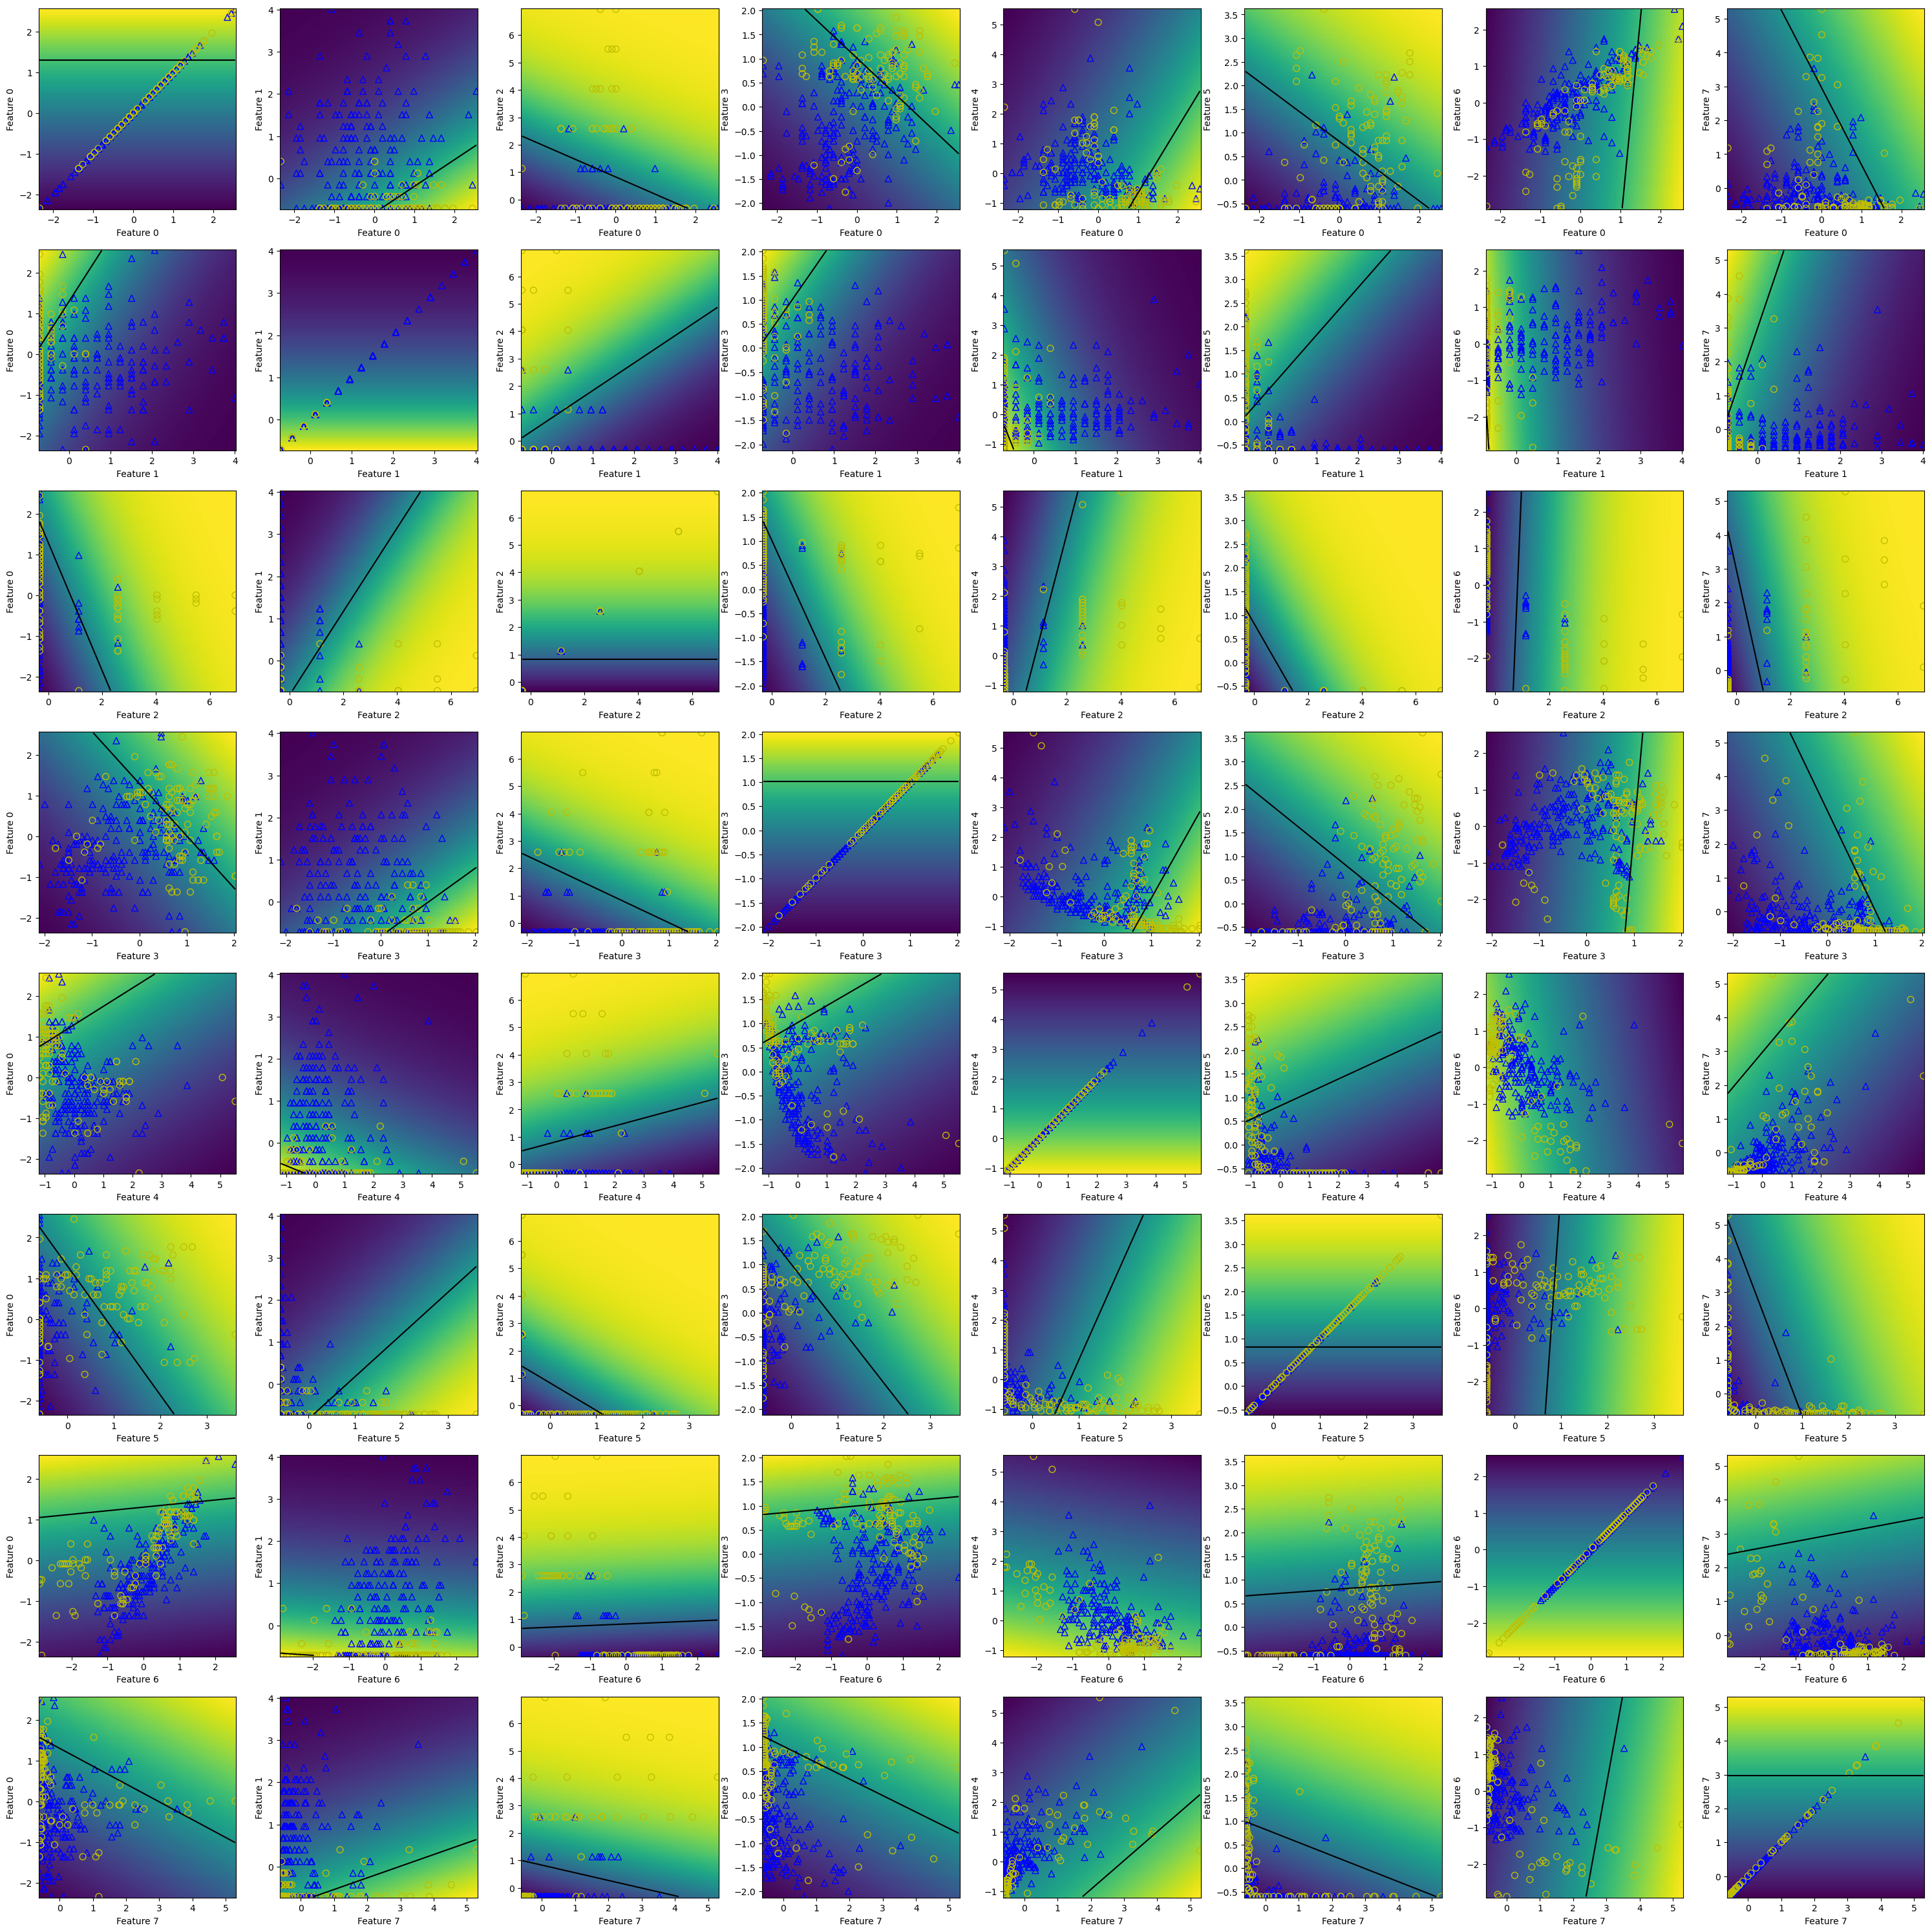

In [ ]:
# Train and a logistic regression model with 300 epochs and learning rate 0.0001
clf = LogisticRegression(eta = 0.0001, epochs = 300, minibatches=1, random_seed=42) # Initializing logistic ragression
clf.fit(X_test_sc, y_test) # Fit the model on the scaled test data

fig, axes = plt.subplots(8, 8, figsize=(30, 30)) # Creating an array of 8x8 subplots 
for i in range(0, 8):
    for j in range(0, 8):
        # Pair of features being visualized in each subplot
        feature_1 = i
        feature_2 = j
        ax = axes[i, j] # Current subplot

        # Labelling the axes
        ax.set_xlabel(f"Feature {feature_1}")
        ax.set_ylabel(f"Feature {feature_2}")

        # Calculating the min and max of each feature
        mins = X_test_sc.min(axis=0)
        maxs = X_test_sc.max(axis=0)

        # Creating 100 evenly spaced values between min and max for each feature 
        x0 = np.linspace(mins[feature_1], maxs[feature_1], 100)
        x1 = np.linspace(mins[feature_2], maxs[feature_2], 100)

        # Creating a 2D meshgrid from the two arrays (x0 and x1)
        X0, X1 = np.meshgrid(x0, x1)
        X_two_features = np.c_[X0.ravel(), X1.ravel()] # Combining X0 and X1 into a 2D array
        X_plot = np.zeros(shape=(X_two_features.shape[0], X_test_sc.shape[1])) # Array to store feature values

        # Retrieving feature values from X_two_features and assigns them to X_plot
        X_plot[:, feature_1] = X_two_features[:, 0]
        X_plot[:, feature_2] = X_two_features[:, 1]

        # Prediciting the probabilities using the logistic regression classifier
        y_pred = clf.predict_proba(X_plot)
        Z = y_pred.reshape(X0.shape) # Reshaping predictions to macth the meshgrid X0

        # Contour plot
        ax.pcolor(X0, X1, Z) # Color of decision surface
        ax.contour(X0, X1, Z, levels=[0.5], colors='k') # Decision boundary at probability = 0.5
        # Scatter plot
        ax.scatter(X_test_sc[y_test == 0, feature_1], X_test_sc[y_test == 0, feature_2], color="b", marker="^", s=50, facecolors="none") # Class 0 samples
        ax.scatter(X_test_sc[y_test == 1, feature_1], X_test_sc[y_test == 1, feature_2], color="y", marker="o", s=50, facecolors="none") # Class 1 samples

# Display plot
fig.tight_layout()
plt.show()

#### Task 5.2

The plot visualizes how the logistic regression classifier separates/classifies the data points (decision boundary) based on different feature pairings.

#### Task 5.3

- **Color gradient**: The color in each subplot represents the predicted probabilites of class memebership. The gradient indicates how likely a point is to belong to either class.
- **Contour line**: The black line represents the decision boundary where the predicted probablility is 0.5 (or 50%). It separates the two classes (0 or 1), with points classified as class 0 on one side and ponits classified as 1 on the other side.
- **Scatter points**: The actual data points. The colors and shapes of the points represents the true class label (blue triangles = class 0, yellow cirles = class 1). This helps visualize the how the decision boundary relates to the actual data.

## Part VI: Additional discussion

### Part I:
1. *What kind of plots did you use to visualize the raw data, and why did you choose these types of plots?*

We chose to use histograms and pairplots to visualize the raw data. Histograms work well for visualizing the distribution, and conveniently also for visualizing binary data such as `fetal_health`. We also used pairplot to check for linear separability.

### Part II:
1. *What happens if we don't shuffle the training data before training the classifiers like in Part IV?*

Our training data was at first sorted by classes, class 0 being the first one put into the training data set (and it's the largest class). So if we don't shuffle the training data before trainig the classifiers, we could risk getting a bigger, unrepresentable share of the first class when splitting into training and testing set, therefore overfitting the model to the first class.

2. *How could you do the same train/test split (Point 1.-4.) using scikit-learn?*

Scikit-learn has its' own function 'train_test_split()' doing exactly what we did manually during these tasks!

Corresponding inputs of 'train_test_split()' as we have worked with manually:
- X: feature matrix
- y: target labels
- test_size: fraction of samples for testing (like the 0.75 we did in the task)
- random_state: a seed for reproducibility
- shuffle: shuffles data before splitting

### Part IV:
1. *How does increasing the dataset size affect the performance of the logistic regression model? Provide a summary of your findings.*

The logistic regression model performs better with increasing samples size and epoch size. With a sample size of 50, and epoch size of 2 the accuracy is 0.78. With increasing sample size and epoch size, the model performance increases with the highest accuracy at 0.88. 

2. *Describe the relationship between the number of epochs and model accuracy*

For Adaline and logistic regression, the models with the highest accuracy are the ones with increasing number of samples and epochs. For Perceptron the results are more varying, with no clear pattern in the heatmap. 

3. *Which classifier is much slower to train and why do you think that is?*

Perceptron: Fastest 🏎️ It has simpler weight updates and stops early if separable.
Adaline: Moderate speed 🚴 It uses gradient descent but updates based on squared errors.
Logistic Regression: Slowest 🐢 It uses sigmoid activation and log loss, and has more complex calculations.

4. *One classifier shows strong fluctuations in accuracy for different dataset sizes and number of epochs. Which one is it and why do you think this happens?*

Perceptron shows strong fluctuations in accuracy for different sample sizes and number of epochs. This likely happens because the data is not linearly separable, and Perceptron is a linear classifier. The model will keep updating the weights back and forth, without finding the optimal solution. 